In [4]:
import math
import numpy as np
import re
import string
import cv2
import os
import errno
import random

In [5]:
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
inputWidth = 18
inputHeight = 22

In [38]:
# You will need to update this path to match the folder in your Google Drive
PATH = "./pictures"
croppedPath = "./cropped"
# labels = !ls "{PATH}"




x0 = 50
y0 = 80
spaceX = 5
spaceFlagX = 105
dy = 170
dx = 95
x1 = x0 + spaceX + dx
x2 = x1 + spaceFlagX + dx
x3 = x2 + spaceX + dx
x4 = x3 + spaceX + dx
n = 0
fileNames = []

for file in os.listdir(PATH):
    if(file.endswith('.png')):
        cropPath = []
        for i in range(4):
            cropPath.append(file[6+i])
        image = cv2.imread(PATH + '/' + file) #converts to grey scale
        grayImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        crop_img1 = 255 - grayImage[y0:y0+dy, x0:x0+dx]
        #crop_img1 = np.expand_dims(crop_img1, axis=2)
        crop_img2 = 255 - grayImage[y0:y0+dy, x1:x1+dx]
        #crop_img2 = np.expand_dims(crop_img2, axis=2)
        crop_img3 = 255 - grayImage[y0:y0+dy, x2:x2+dx]
        #crop_img3 = np.expand_dims(crop_img3, axis=2)
        crop_img4 = 255 - grayImage[y0:y0+dy, x3:x3+dx]
        #crop_img4 = np.expand_dims(crop_img4, axis=2)
        fileName1 = cropPath[0] + str(n) + '.png'
        fileName2 = cropPath[1] + str(n) + '.png'
        fileName3 = cropPath[2] + str(n) + '.png'
        fileName4 = cropPath[3] + str(n) + '.png'
        fileNames.extend([fileName1, fileName2, fileName3, fileName4])
        cv2.imwrite(croppedPath +'/'+ fileName1,crop_img1)
        cv2.imwrite(croppedPath +'/' + fileName2,crop_img2)
        cv2.imwrite(croppedPath +'/' + fileName3,crop_img3)
        cv2.imwrite(croppedPath +'/' + fileName4,crop_img4)
        
        n = n+1
# shuffle data
random.shuffle(fileNames)

In [39]:
#create dictionary

labels = ['0','1','2','3','4','5','6','7','8','9']
labels.extend(list(string.ascii_uppercase))
dictionary = {"image" : [] , "vector": [], "label": []}

In [ ]:
for fileName in fileNames:
    pathToImage = croppedPath + '/' + fileName
    label = fileName[0]
    index = labels.index(label)
    #creating the vector
    vec = [0] * 36
    vec[index] = 1
    img = cv2.imread(pathToImage)
    img = cv2.resize(img,(inputWidth,inputHeight))
#     imgAugmented = np.expand_dims(img, axis=0)
#     plt.imshow(imgAugmented)
    dictionary["image"].append(img/255.0) #normalizing to values between zero and one
    dictionary["vector"].append(vec)
    dictionary["label"].append(label)

In [ ]:
INDEX=100

plt.imshow(dictionary["image"][INDEX])
# print(dictionary["image"][INDEX])
print(dictionary["vector"][INDEX])
print(len(dictionary["vector"]))

In [ ]:
# # train the system

from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
x_train = np.array(dictionary["image"])
y_train = np.array(dictionary["vector"])                   

def blur(image):
    kernelSize = random.randrange(1, 5+1, 2)
    return cv2.GaussianBlur(image,(kernelSize,kernelSize),cv2.BORDER_DEFAULT)

In [ ]:
plt.imshow(blur(dictionary["image"][INDEX]))

In [ ]:
    
datagen = ImageDataGenerator(
                              brightness_range=[0.2,1.0],
                               rotation_range = 1,
                               zoom_range = [0.8,1],
                              validation_split = 0.2,
                             width_shift_range = 0.1,
                              height_shift_range = 0.1,
                             shear_range=0.2,
                            preprocessing_function = blur
                            )
training_generator = datagen.flow(x_train,y_train,batch_size=64,subset='training')
validation_generator = datagen.flow(x_train, y_train, batch_size=64,subset='validation')

plt.figure(figsize=(10,5))
for i in range(6):
     plt.subplot(2,3,i+1)
    for x,y in training_generator:
        plt.imshow((x[0]/255),cmap='gray')
#       plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()
len(x_train)

In [ ]:
# import cv2
# import numpy as np
# import sys
# import time
# import random


# imgWidth = 95
# imgHeight = 170

# def augmentImage(image):
#     distortedImage = 0
#     # possible operations
#     # color distortion, random blur, shear transform, decrease resolution
#     possibleResolutions = [10]
#     possibleBlurs = [3]
#     possibleChannels = [cv2.COLOR_BGR2HSV,cv2.COLOR_BGR2GRAY,'BGR'] #or keep BGR
#     possibleOperations = [possibleResolutions,possibleBlurs,possibleChannels]
#     possibleFunctions = [lowerResolution,blur,changeColorChannel]
#     for index,operation in enumerate(possibleOperations):
#         numberOfOptions = len(operation)
#         randomOperation = operation[random.randint(0,numberOfOptions-1)]
#         distortedImage = possibleFunctions[index](image,randomOperation)
#     return distortedImage
# def changeColorChannel(image,channel):
#     print("color channel")
#     print(channel)
#     if(channel != 'BGR'):
#         print("changed color channel")
#         newImage = cv2.cvtColor(image,channel)
#     else:
#         newImage = image
#     return newImage
        
# # lowers the resolution of the image
# def blur(image,kernelVal):
#     print(kernelVal)
#     return cv2.GaussianBlur(image,(kernelVal,kernelVal),cv2.BORDER_DEFAULT)

# def lowerResolution(frame, percent):
#     print("lowered resolution by")
#     print(percent)
#     width = int(frame.shape[1] * percent/ 100)
#     height = int(frame.shape[0] * percent/ 100)
#     dim = (width, height)
#     resizedImage = cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)
# #     lowResImage = cv2.resize(resizedImage,(imgWidth,imgHeight))
#     plt.imshow(lowResImage)
#     return resizedImage
# # plt.imshow(dictionary["image"][INDEX])
# image = augmentImage(dictionary["image"][INDEX])
# plt.imshow(image)


In [ ]:
def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

In [ ]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(inputHeight,inputWidth, 3)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
# conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# conv_model.add(layers.MaxPooling2D((2, 2), padding = 'same'))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))     

conv_model.summary()

In [ ]:
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

In [ ]:
reset_weights(conv_model)
# history_conv = conv_model.fit(np.array(dictionary["image"]), np.array(dictionary["vector"]), 
#                               validation_data = (np.array(dictionary["image"]), np.array(dictionary["vector"])), 
#                               epochs=20, 
#                               batch_size=8)

history_conv = conv_model.fit_generator(training_generator,steps_per_epoch=(len(x_train)*0.8)//64, epochs=60, validation_data=validation_generator, validation_steps=(len(x_train)*0.2)//64)

In [ ]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()


In [ ]:
#save the trained model
conv_model.save("plateModel.h5")
print("Saved model to disk")

In [23]:
#reload model for further training
from numpy import loadtxt
from keras.models import load_model

from numpy import loadtxt
from keras.models import load_model

from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
 
# load model
number_loaded_model = load_model('numberRealModel.h5')
# summarize model.
number_loaded_model.summary()
# load dataset

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 20, 16, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 8, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 3, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 1, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [10]:
#reload model for further training
from numpy import loadtxt
from keras.models import load_model

from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
 
# load model
letter_loaded_model = load_model('letterModel.h5')
# summarize model.
letter_loaded_model.summary()
# load dataset

Using TensorFlow backend.




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 20, 16, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 8, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 3, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 1, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)            

In [ ]:

# confusion = []
# for i in range(0,len(dictionary["image"])-1):
#     img_aug = np.expand_dims(dictionary["image"][i], axis=0)
#     y_predict = conv_model.predict(img_aug)
#     confusion.append(abs(y_predict - dictionary["vector"][i]))




In [ ]:
# # Display images in the training data set. 
# def rotateImage(image, angle):
#   image_center = tuple(np.array(image.shape[1::-1]) / 2)
#   rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
#   result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
#   return result

confused = []


def displayImage(index):
  img = x_train[index]
#   img = cv2.blur(img,(19,19))
#   img =  rotateImage(img,4)
  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]
#   print(y_predict)
  plt.imshow(img)
  predictVal = max(y_predict)
#   print(predictVal)
  predictedVal_index = np.where(y_predict == predictVal)[0][0]
  predictedVal = labels[predictedVal_index]
  groundTruth_index = np.where(y_train[index] == 1)[0][0]
  groundTruth = labels[groundTruth_index]
#   print("predicted value:",format(predictedVal))
#   print("ground truth:",format(groundTruth))
#   print("hi")    
  if (predictedVal != groundTruth):
   print("predicted value:",format(predictedVal))
   print("ground truth:",format(groundTruth))
   confused.append(1)
for i in range(2000):
    displayImage(i)
print(len(confused))


In [11]:
def blurData(grayImage):
    kernelSize = random.randrange(1, 3+1, 2)
    return cv2.GaussianBlur(grayImage,(kernelSize,kernelSize),cv2.BORDER_DEFAULT)

realDataGen = ImageDataGenerator(
                              brightness_range=[0.8,1.0],
                              rotation_range = 10,
                              zoom_range = [0.8,1],
#                               validation_split = 0.2,
#                               width_shift_range = 0.2,
#                              height_shift_range = 0.2,
                             shear_range=0.2,
#                              validation_split = 0.2,
                             preprocessing_function = blurData
    
                            )

In [28]:
# second round of training with real data from the world
dataDictionary = {"image" : [] , "vector": [], "label": []}
dataPath = "./realData"
numberDataPath = dataPath + "/number"
letterDataPath = dataPath + "/letter"

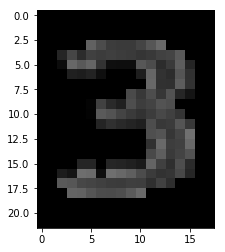

In [29]:
numberLabels = ['0','1','2','3','4','5','6','7','8','9']
numberDataDictionary = {"image" : [] , "vector": [], "label": []}
letterLabels = []
letterLabels.extend(list(string.ascii_uppercase))
letterDataDictionary = {"image" : [] , "vector": [], "label": []}


for file in os.listdir(numberDataPath):
    if(file.endswith('.png')):
        image = cv2.imread(numberDataPath + '/' + file)
        image = cv2.resize(image,(inputWidth,inputHeight))

        grayImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        grayImage3 = np.repeat(grayImage[..., np.newaxis], 3, -1)
        plt.imshow(grayImage3)
#         imageBlur = cv2.GaussianBlur(image,(11,11),cv2.BORDER_DEFAULT)
        dataLabel = file[0]
        #creating the vector
        vec = [0] * 36
        index = numberLabels.index(dataLabel)
        vec[index] = 1
#         print(grayImage)
        numberDataDictionary["image"].append(grayImage3/255.0)#?
        numberDataDictionary["vector"].append(vec)
        numberDataDictionary["label"].append(dataLabel)
        plt.imshow(grayImage3)

In [31]:
def blurData(grayImage):
    kernelSize = random.randrange(1, 3+1, 2)
    return cv2.GaussianBlur(grayImage,(kernelSize,kernelSize),cv2.BORDER_DEFAULT)

realDataGen = ImageDataGenerator(
                              brightness_range=[0.8,1.0],
                              rotation_range = 10,
                              zoom_range = [0.8,1],
#                               validation_split = 0.2,
#                               width_shift_range = 0.2,
#                              height_shift_range = 0.2,
                             shear_range=0.2,
#                              validation_split = 0.2,
                             preprocessing_function = blurData
    
                            )
# data augmentation
datax_train = np.array(numberDataDictionary["image"])
datay_train = np.array(numberDataDictionary["vector"])

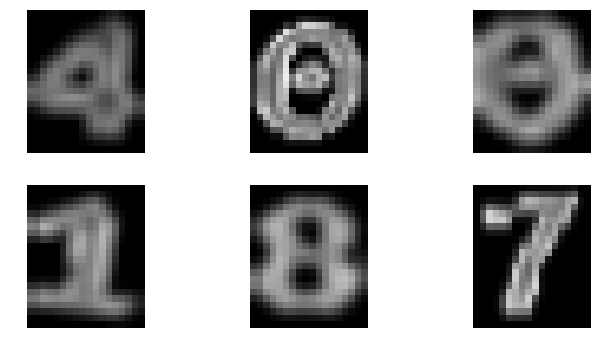

46

In [32]:
data_training_generator = realDataGen.flow(datax_train,datay_train,batch_size=64)
# validation_generator = realDataGen.flow(datax_train, datay_train, batch_size=64,subset='validation')

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in data_training_generator:
        plt.imshow((x[0]/255),cmap='gray')
#         plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()
len(datax_train)

Q-20191124_23-23-23_1.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Y_20191124_23-29-21_2.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
B-20191118_16-22-45firstNumber.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
O_20191124_23-29-01_2.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Y_20191124_23-23-46_1.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
L_20191124_23-23-34_1.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[7 7 7]
  [5 5 5]
  [6 6 6]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [4 4 4]
  [4 4 4]
  [8 8 8]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
F-20191118_16-14-13thirdNumber.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
P-20191118_16-20-12fourthNumber.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
N-20191118_16-14-33fourthNumber.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
U_20191124_23-28-04_2.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[7 7 7]
  [5 5 5]
  [6 6 6]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
R_20191124_23-23-29_2.png
(22, 18, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0

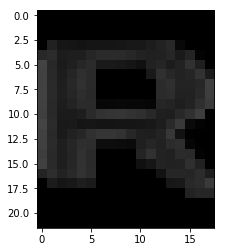

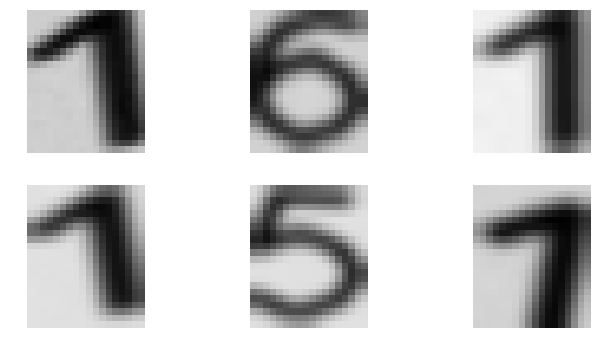

104

In [16]:
# letter retrain
for file in os.listdir(letterDataPath):
    if(file.endswith('.png')):
        print(file)
        image = cv2.imread(letterDataPath + '/' + file)
        image = cv2.resize(image,(inputWidth,inputHeight))

        grayImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        grayImage3 = np.repeat(grayImage[..., np.newaxis], 3, -1)
        print(grayImage3.shape)
        plt.imshow(grayImage3)
#         imageBlur = cv2.GaussianBlur(image,(11,11),cv2.BORDER_DEFAULT)
        dataLabel = file[0]
        #creating the vector
        vec = [0] * 36
        index = letterLabels.index(dataLabel)
        vec[index] = 1
#         print(grayImage)
        letterDataDictionary["image"].append(grayImage3/255.0)#?
        letterDataDictionary["vector"].append(vec)
        letterDataDictionary["label"].append(dataLabel)
        plt.imshow(grayImage3)
        print(grayImage3)
# data augmentation
datax_train = np.array(letterDataDictionary["image"])
datay_train = np.array(letterDataDictionary["vector"])

def blurData(grayImage):
    kernelSize = random.randrange(1, 3+1, 2)
    return cv2.GaussianBlur(grayImage,(kernelSize,kernelSize),cv2.BORDER_DEFAULT)

realDataGen = ImageDataGenerator(
                              brightness_range=[0.8,1.0],
                              rotation_range = 10,
                              zoom_range = [0.8,1],
#                               validation_split = 0.2,
#                               width_shift_range = 0.2,
#                              height_shift_range = 0.2,
                             shear_range=0.2,
#                              validation_split = 0.2,
                             preprocessing_function = blurData
    
                            )
letter_data_training_generator = realDataGen.flow(datax_train,datay_train,batch_size=64)
# validation_generator = realDataGen.flow(datax_train, datay_train, batch_size=64,subset='validation')

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in data_training_generator:
        plt.imshow((x[0]/255),cmap='gray')
#         plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()
len(datax_train)

In [ ]:
print(letterDataDictionary["label"])


In [33]:
LEARNING_RATE = 1e-4
number_loaded_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

In [34]:

loaded_history = loaded_model.fit_generator(data_training_generator,steps_per_epoch=(len(datax_train)*0.8)//64, epochs=60, validation_data=data_training_generator, validation_steps=(len(datax_train)*0.2)//64)

Epoch 1/60


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

In [36]:
LEARNING_RATE = 1e-4
letter_loaded_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])


In [37]:
letter_loaded_history = letter_loaded_model.fit_generator(letter_data_training_generator,steps_per_epoch=(len(datax_train)*0.8)//64, epochs=20, validation_data=letter_data_training_generator, validation_steps=(len(datax_train)*0.2)//64)

Epoch 1/20


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

In [ ]:
#save the trained model
loaded_model.save("numberRealModel.h5")
print("Saved model to disk")

In [ ]:
letter_loaded_model.save("letterRealModel.h5")
print("saved model to disk")

In [ ]:
#reload model for further training
from numpy import loadtxt
from keras.models import load_model
 
# load model
loaded_model = load_model('number1000Model.h5')
# summarize model.
loaded_model.summary()

In [ ]:
def testModel(img,truth):
  grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_aug = np.repeat(grayImg[..., np.newaxis], 3, -1)
  img_aug = cv2.resize(img_aug,(inputWidth,inputHeight))
  img_aug = np.expand_dims(img_aug, axis=0)
  y_predict = loaded_model.predict(img_aug)[0]
#   print(y_predict)
  plt.imshow(img)
  predictVal = max(y_predict)
#   print(predictVal)
  predictedVal_index = np.where(y_predict == predictVal)[0][0]
  predictedVal = labels[predictedVal_index]
#   groundTruth_index = np.where(datay_train[index] == 1)[0][0]
#   groundTruth = labels[groundTruth_index]
#   print("predicted value:",format(predictedVal))
#   print("ground truth:",format(truth))
  if (predictedVal != truth):
   print("predicted value:",format(predictedVal))
   print("ground truth:",format(truth))


dataPath = "./realData"
minWidth = 4000
minHeight = 4000
for file in os.listdir(dataPath):
    if(file.endswith('.png')):
        truth = file[0]
        image = cv2.imread(dataPath + '/' + file) #converts to grey scale
        width, height, dim = image.shape
#         image = cv2.resize(image,(95,170))
        plt.imshow(image)
        testModel(image,truth)

In [ ]:
def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)
newImg = rescale_frame(dictionary["image"][INDEX],10)
plt.imshow(newImg)
plt.imshow(cv2.resize(newImg,(95,170)))